# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# your answer here
temp = pd.read_csv('../your-code/Temp_States.csv')
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Print `temp`

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [6]:
# your answer here


#df = pd.DataFrame(temp, columns= ['State'])
#NY = df.loc[(df['State'] == 'New York')    # Esto estaba mal
 
#NY
            
NY = temp[temp['State'] == 'New York']
NY.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
NY.mean()    #Aquí lo hace porque es la única columna con valor numérico, creo

Temperature    10.740741
dtype: float64

In [8]:
NY.Temperature.mean()  #Otra forma

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
# look look
city_state=temp[temp['Temperature']>15]
city_state.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
# your answer here
mas_15=temp[(temp.Temperature>15)]['City']
mas_15.head()

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [11]:
# your answer here

between=temp[(temp.Temperature>15) & (temp.Temperature<20)]['City']
between.head()

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
# your answer here
temp.groupby('State').agg({'Temperature':['mean','std']})

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# your answer here
employee=pd.read_csv('./employee.csv')
employee.info

<bound method DataFrame.info of      Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70>

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Salary', ylabel='Count'>

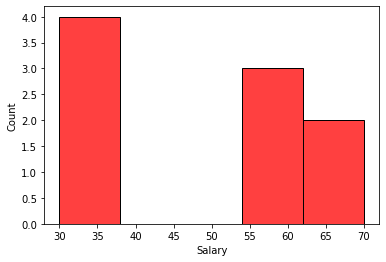

In [15]:
# your answer here
sns.histplot(x=employee.Salary, color= 'r')    #Le meto color for fun, el estandar es azul

#### What's the average salary in this company?

In [16]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [17]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [18]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [19]:
# your answer here
employee[employee['Salary']==employee['Salary'].min()]    #tendía que probar si se puede hacer con iloc

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [20]:
# your answer here
employee[employee['Name']=='David'];

#### Could you give only David's salary?

In [21]:
# your answer here
david= employee[employee['Name']=='David']['Salary'];

david

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [22]:
# your answer here
employee[(employee.Title=='associate')]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [23]:
# your answer here- 1 method
employee[0:3]   #selección por índices


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [24]:
# your answer here- 2nd method
employee.head(3)    #selección de head

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [25]:
# your answer here

employee[(employee.Title == 'associate') & (employee.Salary > 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [26]:
# your answer here
employee.groupby('Years').agg({'Salary':['mean']}).T   #Con Transpose se lee mejor. like it

,Years,1,2,3,4,7,8
Salary,mean,35.0,38.333333,55.0,35.0,60.0,70.0


####  What is the average Salary per title?

In [27]:
# your answer here

employee.groupby('Title').agg({'Salary':['mean']}).T

,Title,VP,analyst,associate
Salary,mean,70.0,32.5,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

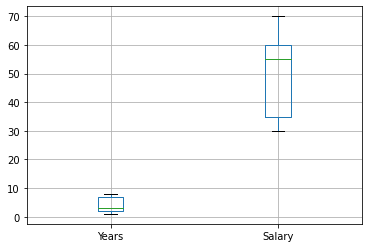

In [28]:
# draw boxplot here
employee.boxplot()

In [29]:
# print first quartile here

employee.quantile([0.25])

,Years,Salary
0.25,2.0,35.0


In [30]:
# print third quartile here
employee.quantile([0.75])   #solo cambiar el numerito

,Years,Salary
0.75,7.0,60.0


#### Is the mean salary per gender different?

In [31]:
# your answer here
employee.groupby('Gender').agg({'Salary':['mean']})    #Bueno una vez que se saca el proceso es siempre parecido

,Salary
,mean
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [32]:
# your answer here
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [33]:
# your answer here

employee.groupby('Department').agg({'Salary':'max'})-employee.groupby('Department').agg({'Salary':'min'})

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [34]:
# your answer here
import zipfile   #está en un zip

zf=zipfile.ZipFile('./Orders.zip')

orders=pd.read_csv(zf.open('Orders.csv'))

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
# your answer here

orders.dtypes


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [36]:
# your answer here
orders.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [37]:
# your answer here
orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [38]:
# your answer here
orders.UnitPrice.max()

8142.75

In [39]:
# your answer here
orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [40]:
# your answer here
orders[orders.Country=='Spain']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [41]:
# your answer here
#orders[orders.Country=='Spain']    A esto, que es lo anterior, se le añade el país

orders.Country[orders.Country=='Spain'].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [42]:
# your answer here
len(orders[orders.Quantity>50]['CustomerID'])   #miro la len porque es más cómodo

11609

#### Select orders from Spain that are above 50 items

In [43]:
# your answer here
spain50 = orders[(orders.Country=='Spain')&(orders.Quantity>50)]


In [44]:
len(spain50)

39

#### Select all free orders

In [45]:
# your answer here
#spain50.amount_spent
spain50.UnitPrice

4250      1.65
4251      1.45
4252      1.65
4253      1.65
4254      1.45
32454     3.39
32455     3.39
32456     3.39
32457     3.39
91155     1.45
91156     1.45
91159     1.45
174442    1.45
174443    1.45
174444    1.45
174445    1.45
174446    3.75
174447    3.75
174448    3.75
174449    3.75
197167    0.72
197168    1.45
197169    0.72
197170    1.04
197171    0.72
224881    0.85
254097    0.12
289129    2.55
289134    2.55
289142    1.25
289143    1.25
295956    0.69
312655    0.29
312656    0.29
312657    0.29
366326    1.45
366327    3.75
366328    3.75
366329    3.75
Name: UnitPrice, dtype: float64

In [46]:
orders[orders.UnitPrice==0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [47]:
# your answer here 
#orders[orders.Description=='lunch bag']   Así no funciona, hay que meterle el contains 

In [48]:
orders[orders.Description.str.contains('lunch bag')]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here


#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here